In [1]:
import numpy as np
import scipy.sparse as sp
from sklearn.neighbors import NearestNeighbors, kneighbors_graph

class Isomap:
    def __init__(self, n_components=2, n_neighbors=5):
        self.n_components = n_components
        self.n_neighbors = n_neighbors
        self.graph_ = None
        self.embedding_ = None

    def fit_transform(self, X):
        # Compute pairwise distances
        self.graph_ = kneighbors_graph(X, n_neighbors= self.n_neighbors ).toarray()
        
        # Compute shortest path distances
        D = sp.csgraph.shortest_path(self.graph_, method='D')
        for i in range((D.shape[0])):
            for j in range((D.shape[0])):
                if D[i,j] != D[j,i]:
                    k = np.min([D[i,j], D[j,i]])
                    D[i,j] = k
                    D[j,i] = k


        # Apply MDS to the distance matrix
        # double center
        n = D.shape[0]
        one_n = np.ones((n, n)) / n
        G = (D - one_n.dot(D) - D.dot(one_n) + one_n.dot(D).dot(one_n))
        G = -(1/2 )* G

        eig_vals, eig_vecs = np.linalg.eig(G)
        eig_vals = np.where(eig_vals<0,0, eig_vals)
        sorted_indices = np.argsort(eig_vals)[::-1]
        sorted_eigvecs = eig_vecs[:,sorted_indices]
        sorted_eigvals = eig_vals[sorted_indices]

        # select the first k eigenvector(s) and project
        top_k_eigvecs = sorted_eigvecs[:,:self.n_components]
        top_k_eigvals = sorted_eigvals[:self.n_components]


        # Compute final embedding
        self.embedding_ = np.dot(top_k_eigvecs, np.sqrt(np.diag(top_k_eigvals)))

        return self.embedding_


Text(0.5, 1.0, 'Reconstructed spiral with hand-made isomap')

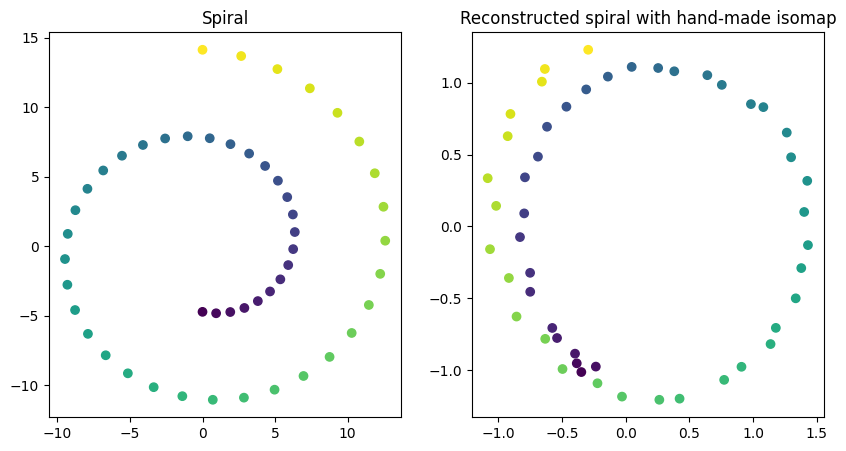

In [6]:
import math
from matplotlib import pyplot as plt
N = 50

phi = np.linspace(1.5*math.pi, 4.5*math.pi, N)

x = phi*np.cos(phi)
y = phi*np.sin(phi)

X = np.array([x,y]).reshape(2,N).T


map = Isomap(n_components=2)
Y = map.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(x,y, c = phi)
ax1.set_title('Spiral')

ax2.scatter(Y[:,0], Y[:,1], c = phi)
ax2.set_title('Reconstructed spiral with hand-made isomap')


Text(0.5, 1.0, 'Reconstructed spiral with hand-made isomap')

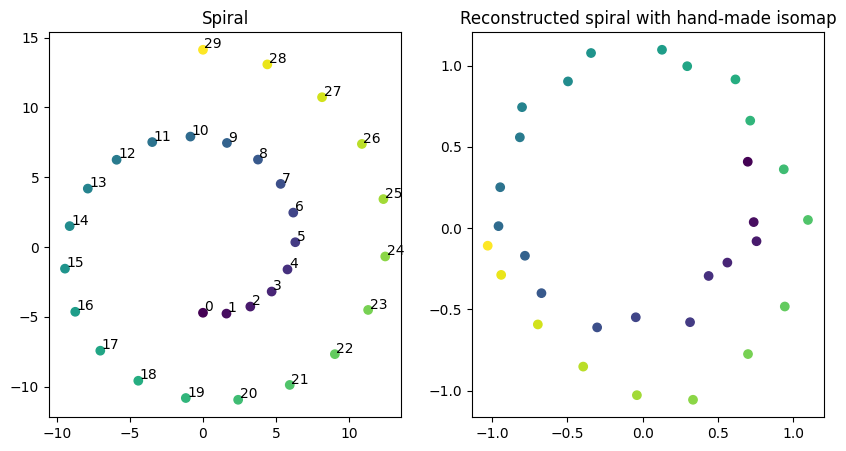

In [16]:
import math
from matplotlib import pyplot as plt
N = 30

phi = np.linspace(1.5*math.pi, 4.5*math.pi, N)

x = phi*np.cos(phi)
y = phi*np.sin(phi)

X = np.array([x,y]).reshape(2,N).T


map = Isomap(n_components=2)
Y = map.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(x,y, c = phi)
_ = [ax1.text(x[i]+0.1, y[i]+0.1, str(i)) for i in range(len(x))]
ax1.set_title('Spiral')

ax2.scatter(Y[:,0], Y[:,1], c = phi)
#_ = [ax2.text(Y[i,0]+0.1, Y[i,1]+0.1, str(i)) for i in range(len(x))]
ax2.set_title('Reconstructed spiral with hand-made isomap')


Text(0.5, 1.0, 'Reconstructed spiral with hand-made isomap')

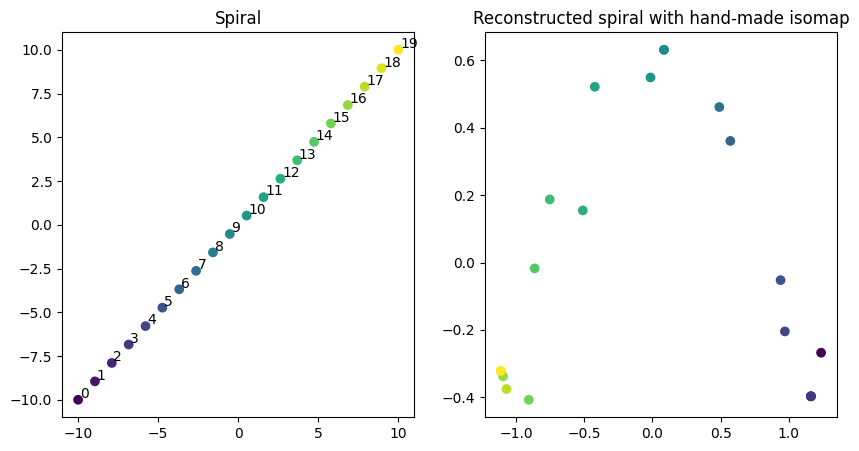

In [15]:
import math
from matplotlib import pyplot as plt
N = 20

phi = np.linspace(-10, 10, N)

x = phi
y = phi

X = np.array([x,y]).reshape(2,N).T


map = Isomap(n_components=2)
Y = map.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(x,y, c = phi)
_ = [ax1.text(x[i]+0.1, y[i]+0.1, str(i)) for i in range(len(x))]
ax1.set_title('Spiral')

ax2.scatter(Y[:,0], Y[:,1], c = phi)
#_ = [ax2.text(Y[i,0]+0.1, Y[i,1]+0.1, str(i)) for i in range(len(x))]
ax2.set_title('Reconstructed spiral with hand-made isomap')
